# Project: TMDb Movie Data Analysis


## Introduction 

> Many a times, investments are made based on the outlook of a business. Business stakeholders, most especially the investors, make some business investments based on permutations and hopes in God. There business decisions at times are not made as a result of empirical evidences and researches that the business they are investing in would yield high ROI. 

> **Here, our aim is to change those narratives.** We would be with those investors at every step of the way and guide there decision making process. 

### Business Endeavor 

> A well known investor is about to make huge investment in **Film Industry**. His main goal is to make investment in movie(s) that would yield high **ROI**. As Data Analyst, we are to guide him in making that investment decision based on the historical data we've been able to gathered in Film Industry. 

## Project Statement 

> **We want to analyse the attributes that contribute more to the high ROI.** We want know the features in the dataset that must be considered in aiming for high revenue which would lead to high profit. 

> The **dependent variable (Profit)** in this instance would be a derived variable from the budget and revenue. 

> Also, the **independent variables;**
> * budget
> * popularity
> * cast
> * director
> * production_companies
> * genres
> * release_month (will be engineered from release_date) 
> * release_day (will be engineered from release_date)
> * runtime
> * vote_count
> * vote_average 

> would be our focus. We want know those ones' that are crucial to High profit. 

## Dataset Content 

> The dataset is **TMDb movie data.** This data set contains information about 10,000 movies collected from The Movie Database (TMDb). In the data set we have;

> **Columns:** 21

> **Row:** 10866

**Note:** The final two columns ending with “_adj” show the budget and revenue of the associated movie in terms of 2010 dollars, accounting for inflation over time. 

## Project Workflow 

* Import the libraries
* Import and view the dataset
* Clean and Preprocess the data
* Exploratory Data Analysis
* Conclusion 

## Step 1

### Importing the project libraries

In [1]:
# Here, we would import the libraries that we would be using for this project 
import os
os.environ['PATH'].split(';')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Step 2 

### Importing the dataset and viewing the dataset

In [2]:
# Importing the dataset 
# Viewing the dataset

df_movies = pd.read_csv('tmdb-movies.csv')
df_movies.head(3)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08


## Step 3

### Cleaning and Preprocessing the data

Here, we would focus on;
- dropping the irrelevant features to the project
- check and deal with missing data 
- check and deal with duplicated data(sample)
- derive our target column
- check and deal with datatypes of each feature
- engineer new samples/features to the dataset to give more strenght to our analysis 

In [3]:
## viewing the column names

df_movies.columns

Index(['id', 'imdb_id', 'popularity', 'budget', 'revenue', 'original_title',
       'cast', 'homepage', 'director', 'tagline', 'keywords', 'overview',
       'runtime', 'genres', 'production_companies', 'release_date',
       'vote_count', 'vote_average', 'release_year', 'budget_adj',
       'revenue_adj'],
      dtype='object')

`Before we start cleaning in it's entirety, irrelevant features in the dataset will be dropped since they contribute little to nothing to the analysis`

The features that will be dropped in this first instance are;
- homepage
- tagline
- overview 
- release_year

In [4]:
## dropping the irrelevant columns 

df_movies.drop(['homepage', 'tagline', 'overview', 'release_year'],
               axis = 1,
               inplace=True)
df_movies.head(3)

,id,imdb_id,popularity,budget,revenue,original_title,cast,director,keywords,runtime,genres,production_companies,release_date,vote_count,vote_average,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,monster|dna|tyrannosaurus rex|velociraptor|island,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,future|chase|post-apocalyptic|dystopia|australia,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,based on novel|revolution|dystopia|sequel|dyst...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,1.012000e+08,2.716190e+08


> In addition to the above feature dropping, it's of the believe that **keywords feature** should be dropped too since **genres feature** can stand inplace for it. Though, it might have it's contribution to revenue/profit. However, it's contribution to this analysis is outside the scope of this project. 

In [5]:
## dropping the keywords column 

df_movies.drop(['keywords'], 
               axis=1,
               inplace = True)
df_movies.head(3)

,id,imdb_id,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,1.012000e+08,2.716190e+08


In [6]:
## check and deal with missing data

df_movies.isna().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
director                  44
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
budget_adj                 0
revenue_adj                0
dtype: int64

We have missing data in;
- imdb_id
- cast
- director
- genres
- 1030

In [7]:
## viewing the shape of the dataset 

df_movies.shape

(10866, 16)

Since we have enough data to make our analysis, we would be dropping all the rows that have missing data 

In [8]:
# drop rows with any null values in the dataset

df_movies.dropna(inplace=True)

## viewing the shape again after dropping the null values 

df_movies.shape

(9771, 16)

Check and deal with duplicated data(sample)

In [9]:
## Viewing the duplicated samples 

df_movies.duplicated().sum()

1

In [10]:
# Drop the duplicate

df_movies.drop_duplicates(inplace=True)

# Confirm if we still have duplicate sample 

df_movies.duplicated().sum().any()

False

We have no duplicate in the dataset again 

Next is to derive our target column. 

Our target column is **Profit.** The target column will be derived by subtracting `budget column from revenue`.

Furthermore, since the budget_adj and revenue_adj columns reflected the dollars terms and inflations overtime, both columns would be our focus in determining the target column 

In [11]:
# Deriving the target column 

df_movies['profit_adj'] = df_movies['revenue_adj'] - df_movies['budget_adj']

# Viewing the dataset and understand the target column more

df_movies

,id,imdb_id,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,budget_adj,revenue_adj,profit_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,1.379999e+08,1.392446e+09,1.254446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,1.379999e+08,3.481613e+08,2.101614e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,1.012000e+08,2.716190e+08,1.704191e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,1.839999e+08,1.902723e+09,1.718723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,1.747999e+08,1.385749e+09,1.210949e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10861,21,tt0060371,0.080598,0,0,The Endless Summer,Michael Hynson|Robert August|Lord 'Tally Ho' B...,Bruce Brown,95,Documentary,Bruce Brown Films,6/15/66,11,7.4,0.000000e+00,0.000000e+00,0.000000e+00
10862,20379,tt0060472,0.065543,0,0,Grand Prix,James Garner|Eva Marie Saint|Yves Montand|Tosh...,John Frankenheimer,176,Action|Adventure|Drama,Cherokee Productions|Joel Productions|Douglas ...,12/21/66,20,5.7,0.000000e+00,0.000000e+00,0.000000e+00
10863,39768,tt0060161,0.065141,0,0,Beregis Avtomobilya,Innokentiy Smoktunovskiy|Oleg Efremov|Georgi Z...,Eldar Ryazanov,94,Mystery|Comedy,Mosfilm,1/1/66,11,6.5,0.000000e+00,0.000000e+00,0.000000e+00
10864,21449,tt0061177,0.064317,0,0,"What's Up, Tiger Lily?",Tatsuya Mihashi|Akiko Wakabayashi|Mie Hama|Joh...,Woody Allen,80,Action|Comedy,Benedict Pictures Corp.,11/2/66,22,5.4,0.000000e+00,0.000000e+00,0.000000e+00


Going forward, only `budget_adj` and `profit_adj`. So, we will the following columns:
- budget
- revenue
- revenue_adj

In [12]:
## drop budget, revenue, and revenue_adj columns 

df_movies.drop(['budget', 'revenue', 'revenue_adj'],
               axis = 1, 
               inplace = True)

## viewing the dataset 

df_movies.head(2)

,id,imdb_id,popularity,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,budget_adj,profit_adj
0,135397,tt0369610,32.985763,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,1.379999e+08,1.254446e+09
1,76341,tt1392190,28.419936,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,1.379999e+08,2.101614e+08


In [13]:
# Making the values in both budget_adj and profit_adj integers 

df_movies[['budget_adj', 'profit_adj']] = df_movies[['budget_adj', 'profit_adj']].astype(int)
df_movies.head(3)

,id,imdb_id,popularity,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,budget_adj,profit_adj
0,135397,tt0369610,32.985763,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,137999939,1254445953
1,76341,tt1392190,28.419936,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,137999939,210161353
2,262500,tt2908446,13.112507,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,101199955,170419069


> Check and deal with datatypes of each feature

In [14]:
## checking the datatypes of each columns

df_movies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9770 entries, 0 to 10865
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    9770 non-null   int64  
 1   imdb_id               9770 non-null   object 
 2   popularity            9770 non-null   float64
 3   original_title        9770 non-null   object 
 4   cast                  9770 non-null   object 
 5   director              9770 non-null   object 
 6   runtime               9770 non-null   int64  
 7   genres                9770 non-null   object 
 8   production_companies  9770 non-null   object 
 9   release_date          9770 non-null   object 
 10  vote_count            9770 non-null   int64  
 11  vote_average          9770 non-null   float64
 12  budget_adj            9770 non-null   int64  
 13  profit_adj            9770 non-null   int64  
dtypes: float64(2), int64(5), object(7)
memory usage: 1.1+ MB


    From the above, only release_date column is not in it's correct datatype 
    
    So, we would be converting the release_date column to datetime datatype 

In [15]:
# Converting release date datatype to datetime

df_movies.release_date = pd.to_datetime(df_movies['release_date'])

## viewing the info again 

df_movies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9770 entries, 0 to 10865
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   id                    9770 non-null   int64         
 1   imdb_id               9770 non-null   object        
 2   popularity            9770 non-null   float64       
 3   original_title        9770 non-null   object        
 4   cast                  9770 non-null   object        
 5   director              9770 non-null   object        
 6   runtime               9770 non-null   int64         
 7   genres                9770 non-null   object        
 8   production_companies  9770 non-null   object        
 9   release_date          9770 non-null   datetime64[ns]
 10  vote_count            9770 non-null   int64         
 11  vote_average          9770 non-null   float64       
 12  budget_adj            9770 non-null   int64         
 13  profit_adj       

    We want engineer more from the release_date column to be more specific about the focus in the date. Going forward, we only want resign ourselves to the day of the week and the month of the year the movies dropped. These will be extracted from the release_date 

In [16]:
## Extracting and making new column for day of the week and month of the year 

df_movies['release_day'] = df_movies['release_date'].dt.day_name()
df_movies['release_month'] = df_movies['release_date'].dt.month_name()
## Viewing the dataset 

df_movies.head(3)

,id,imdb_id,popularity,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,budget_adj,profit_adj,release_day,release_month
0,135397,tt0369610,32.985763,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,137999939,1254445953,Tuesday,June
1,76341,tt1392190,28.419936,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,2015-05-13,6185,7.1,137999939,210161353,Wednesday,May
2,262500,tt2908446,13.112507,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,2015-03-18,2480,6.3,101199955,170419069,Wednesday,March


In [17]:
## Drop release_date 

df_movies.drop(['release_date'], axis=1, inplace=True)

df_movies.head(3)

,id,imdb_id,popularity,original_title,cast,director,runtime,genres,production_companies,vote_count,vote_average,budget_adj,profit_adj,release_day,release_month
0,135397,tt0369610,32.985763,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,5562,6.5,137999939,1254445953,Tuesday,June
1,76341,tt1392190,28.419936,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,6185,7.1,137999939,210161353,Wednesday,May
2,262500,tt2908446,13.112507,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,2480,6.3,101199955,170419069,Wednesday,March


> Since we would be needing one unique id column for the analysis, between **id** and **imdb_id**, one needs to drop.

In [18]:
## Check which unique id column correspond to the total number of samples

# id 
print(df_movies.id.nunique() == df_movies.shape[0])

# imdb_id
print(df_movies.imdb_id.nunique() == df_movies.shape[0])

True
True


    Since both correspond to the total number of samples, imdb_id column will be dropped 

In [19]:
## Drop imdb_id 

df_movies.drop(['imdb_id'], axis=1, inplace=True)

## view the dataset

df_movies.head()

,id,popularity,original_title,cast,director,runtime,genres,production_companies,vote_count,vote_average,budget_adj,profit_adj,release_day,release_month
0,135397,32.985763,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,5562,6.5,137999939,1254445953,Tuesday,June
1,76341,28.419936,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,6185,7.1,137999939,210161353,Wednesday,May
2,262500,13.112507,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,2480,6.3,101199955,170419069,Wednesday,March
3,140607,11.173104,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,5292,7.5,183999919,1718723210,Tuesday,December
4,168259,9.335014,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,2947,7.3,174799923,1210948878,Wednesday,April


> Engineer new samples/features to the dataset to give more strenght to our analysis. This will be done on the copy of our dataset for each feature we want to engineer  

> The following columns would be the focus of this aspect:
- cast
- genres 
- production_companies 

**cast column**

In [20]:
print(df_movies.shape)

## Making a copy of the dataset for cast 

df_movies_cast = df_movies.copy()
df_movies_cast.head()

(9770, 14)


,id,popularity,original_title,cast,director,runtime,genres,production_companies,vote_count,vote_average,budget_adj,profit_adj,release_day,release_month
0,135397,32.985763,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,5562,6.5,137999939,1254445953,Tuesday,June
1,76341,28.419936,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,6185,7.1,137999939,210161353,Wednesday,May
2,262500,13.112507,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,2480,6.3,101199955,170419069,Wednesday,March
3,140607,11.173104,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,5292,7.5,183999919,1718723210,Tuesday,December
4,168259,9.335014,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,2947,7.3,174799923,1210948878,Wednesday,April


In [21]:
## Checking the value_count of the cast feature 

print(df_movies_cast.cast.value_counts())

print(df_movies_cast.cast.nunique() == len(df_movies_cast.cast.value_counts()))

William Shatner|Leonard Nimoy|DeForest Kelley|James Doohan|George Takei             5
Louis C.K.                                                                          4
George Carlin                                                                       3
Jim Jefferies                                                                       3
Jennifer Lawrence|Josh Hutcherson|Liam Hemsworth|Woody Harrelson|Elizabeth Banks    3
                                                                                   ..
Matt Bomer|Jerry O'Connell|Liv Tyler|Marisa Coughlan|Patrick Wilson                 1
Jessica Alba|Devon Aoki|Alexis Bledel|Powers Boothe|Rosario Dawson                  1
Rosario Dawson|Danny Trejo|Sheri Moon Zombie|Paul Giamatti|Cassandra Peterson       1
Dennis Quaid|Rene Russo|Sean Faris|Katija Pevec|Dean Collins                        1
Colin Farrell|Alicja Bachleda-CuruÅ›|Dervla Kirwan|Alison Barry|Marion O'Dwyer      1
Name: cast, Length: 9721, dtype: int64
True


    From the result above, we can deduce that less than 60 movies have common cast. With that, there is no how we would know the actors that were casted more in movies and also their relationship to profit from the movies.
    
Checking any movies that have single cast

In [22]:
## Separating the hybrid casted movies 

df_movies_cast_hybrid = df_movies_cast[df_movies_cast['cast'].str.split('|').str.len()>1]

# dropping the hybrid casted movies from the df_movies_cast

df_movies_cast_single = df_movies_cast.drop(df_movies_cast_hybrid.index)

df_movies_cast_single.shape, df_movies_cast_hybrid.shape

((84, 14), (9686, 14))

`With the result, there are movies that were casted by single actor`

       So, we want to make new sample rows for each actor casted in each movie for both single casted and hybrid casted, and make dataframe out of it 
    
The following are the steps to be taken:
- Define a function to separate the hybrid values 
- Separate the hybrid values to new row 
- Rearrange the columns 

In [23]:
# Defining a function

def explode(df, lst_cols, fill_value='', preserve_index=False):
    # make sure `lst_cols` is list-alike
    if (lst_cols is not None
        and len(lst_cols) > 0
        and not isinstance(lst_cols, (list, tuple, np.ndarray, pd.Series))):
        lst_cols = [lst_cols]
    # all columns except `lst_cols`
    idx_cols = df.columns.difference(lst_cols)
    # calculate lengths of lists
    lens = df[lst_cols[0]].str.len()
    # preserve original index values    
    idx = np.repeat(df.index.values, lens)
    # create "exploded" DF
    res = (pd.DataFrame({
                col:np.repeat(df[col].values, lens)
                for col in idx_cols},
                index=idx)
             .assign(**{col:np.concatenate(df.loc[lens>0, col].values)
                            for col in lst_cols}))
    # append those rows that have empty lists
    if (lens == 0).any():
        # at least one list in cells is empty
        res = (res.append(df.loc[lens==0, idx_cols], sort=False)
                  .fillna(fill_value))
    # revert the original index order
    res = res.sort_index()
    # reset index if requested
    if not preserve_index:        
        res = res.reset_index(drop=True)
    return res

In [24]:
# Separating the hybrid values for cast column 
# for all the movies regardless of the cast column attribute 
# for only hybrid casted movies 

df_movies_cast_comb = explode(df_movies_cast.assign(cast=df_movies_cast.cast.str.split('|')), 'cast')

df_movies_cast_hybrid_sep = explode(df_movies_cast_hybrid.assign(cast=df_movies_cast_hybrid.cast.str.split('|')), 'cast')

# Viewing the shape 

df_movies_cast_comb.shape, df_movies_cast_hybrid_sep.shape

((48010, 14), (47926, 14))

In [25]:
# View the column names

df_movies_cast_comb.columns 

Index(['budget_adj', 'director', 'genres', 'id', 'original_title',
       'popularity', 'production_companies', 'profit_adj', 'release_day',
       'release_month', 'runtime', 'vote_average', 'vote_count', 'cast'],
      dtype='object')

In [26]:
## rearranging the columns 

df_movies_cast_comb = df_movies_cast_comb.reindex(columns= ['id', 
                                 'original_title',
                                 'production_companies',
                                 'genres',
                                 'director', 
                                 'cast',
                                 'release_month',
                                 'release_day',
                                 'runtime',
                                 'budget_adj',
                                 'profit_adj',
                                 'vote_average',
                                 'vote_count',
                                 'popularity'])


df_movies_cast_hybrid_sep = df_movies_cast_hybrid_sep.reindex(columns= ['id', 
                                 'original_title',
                                 'production_companies',
                                 'genres',
                                 'director', 
                                 'cast',
                                 'release_month',
                                 'release_day',
                                 'runtime',
                                 'budget_adj',
                                 'profit_adj',
                                 'vote_average',
                                 'vote_count',
                                 'popularity'])
df_movies_cast_comb.head()

,id,original_title,production_companies,genres,director,cast,release_month,release_day,runtime,budget_adj,profit_adj,vote_average,vote_count,popularity
0,135397,Jurassic World,Universal Studios|Amblin Entertainment|Legenda...,Action|Adventure|Science Fiction|Thriller,Colin Trevorrow,Chris Pratt,June,Tuesday,124,137999939,1254445953,6.5,5562,32.985763
1,135397,Jurassic World,Universal Studios|Amblin Entertainment|Legenda...,Action|Adventure|Science Fiction|Thriller,Colin Trevorrow,Bryce Dallas Howard,June,Tuesday,124,137999939,1254445953,6.5,5562,32.985763
2,135397,Jurassic World,Universal Studios|Amblin Entertainment|Legenda...,Action|Adventure|Science Fiction|Thriller,Colin Trevorrow,Irrfan Khan,June,Tuesday,124,137999939,1254445953,6.5,5562,32.985763
3,135397,Jurassic World,Universal Studios|Amblin Entertainment|Legenda...,Action|Adventure|Science Fiction|Thriller,Colin Trevorrow,Vincent D'Onofrio,June,Tuesday,124,137999939,1254445953,6.5,5562,32.985763
4,135397,Jurassic World,Universal Studios|Amblin Entertainment|Legenda...,Action|Adventure|Science Fiction|Thriller,Colin Trevorrow,Nick Robinson,June,Tuesday,124,137999939,1254445953,6.5,5562,32.985763


Our dataframes in this section are;
- df_movies_cast_single ==> for single casted movies 
- df_movies_cast_hybrid ==> for more than one casted movies
- df_movies_cast_hybrid_sep ==> for more than one casted movies separated to make new rows 
- df_movies_cast_comb ==> for combination of both single and hybrid casted movies separated to make new rows 

    More analysis will done on df_movies_cast dataframe later on in Exploratory Data Analysis Section 
    
**genres columns**

This will take the same process as cast column 

In [27]:
## Making a copy of initial dataframe for genres 

df_movies_genres = df_movies.copy()

We would be analysing this genres of movies in three aspects:
1. movies that have more than one genres of movies 
2. movies that only have one genres of movies 
3. and the combination of both

So, we would be different dataframes for each aspect

`These steps would apply to production_companies too`

In [28]:
# Separating df_movies_genres by hybrid 

df_movies_genres_hybrid= df_movies_genres[df_movies_genres['genres'].str.split('|').str.len()>1]

df_movies_genres_hybrid.shape

(7811, 14)

In [29]:
df_movies_genres_hybrid.tail()

,id,popularity,original_title,cast,director,runtime,genres,production_companies,vote_count,vote_average,budget_adj,profit_adj,release_day,release_month
10858,31918,0.317824,"The Russians Are Coming, The Russians Are Coming",Carl Reiner|Eva Marie Saint|Alan Arkin|Brian K...,Norman Jewison,126,Comedy|War,The Mirisch Corporation,11,5.5,0,0,Tuesday,May
10859,20620,0.089072,Seconds,Rock Hudson|Salome Jens|John Randolph|Will Gee...,John Frankenheimer,100,Mystery|Science Fiction|Thriller|Drama,Gibraltar Productions|Joel Productions|John Fr...,22,6.6,0,0,Tuesday,October
10862,20379,0.065543,Grand Prix,James Garner|Eva Marie Saint|Yves Montand|Tosh...,John Frankenheimer,176,Action|Adventure|Drama,Cherokee Productions|Joel Productions|Douglas ...,20,5.7,0,0,Tuesday,December
10863,39768,0.065141,Beregis Avtomobilya,Innokentiy Smoktunovskiy|Oleg Efremov|Georgi Z...,Eldar Ryazanov,94,Mystery|Comedy,Mosfilm,11,6.5,0,0,Friday,January
10864,21449,0.064317,"What's Up, Tiger Lily?",Tatsuya Mihashi|Akiko Wakabayashi|Mie Hama|Joh...,Woody Allen,80,Action|Comedy,Benedict Pictures Corp.,22,5.4,0,0,Tuesday,November


In [30]:
# viewing the number uniques values for genres column

print(df_movies_genres_hybrid.genres.nunique())

## Checking if the total samples in the
## df_movies matches the samples in df_movies_genres_hybrid

print(df_movies.shape[0] == df_movies_genres_hybrid.shape[0])

1897
False


    The above analysis show that, biggest part of the movies warehouse have more than one genres of movie. With that, we would extract the ones that have single genres 

Separating the dataset for movies that have only one genres

In [31]:
# dropping the hybrid genres from the df_movies_genres

df_movies_genres_single = df_movies_genres.drop(df_movies_genres_hybrid.index)

# checking the shape of the dataframe 

df_movies_genres_single.shape

(1959, 14)

In [32]:
# viewing the dataframe 

df_movies_genres_single.head()

,id,popularity,original_title,cast,director,runtime,genres,production_companies,vote_count,vote_average,budget_adj,profit_adj,release_day,release_month
25,177677,4.566713,Mission: Impossible - Rogue Nation,Tom Cruise|Jeremy Renner|Simon Pegg|Rebecca Fe...,Christopher McQuarrie,131,Action,Paramount Pictures|Skydance Productions|China ...,2349,7.1,137999939,489743512,Thursday,July
26,214756,4.564549,Ted 2,Mark Wahlberg|Seth MacFarlane|Amanda Seyfried|...,Seth MacFarlane,115,Comedy,Universal Pictures|Media Rights Capital|Fuzzy ...,1666,6.3,62559972,136034457,Thursday,June
51,257211,2.814802,The Intern,Robert De Niro|Anne Hathaway|Rene Russo|Anders...,Nancy Meyers,121,Comedy,Waverly Films|Warner Bros.,1255,7.1,32199985,146799433,Thursday,September
55,295964,2.584264,Burnt,Bradley Cooper|Sienna Miller|Lily James|Alicia...,John Wells,100,Drama,Double Feature Films|PeaPie Films|3 Arts Enter...,631,6.3,18399991,15278196,Friday,October
58,306819,2.557859,The Danish Girl,Eddie Redmayne|Alicia Vikander|Matthias Schoen...,Tom Hooper,120,Drama,Pretty Pictures|Working Title Films|ArtÃ©mis P...,867,7.3,13799993,45256181,Friday,November


Next is to get a dataframe for both single and hybrid genres movies 

In [33]:
## Checking the value_count of the genres feature 

df_movies_genres.genres.value_counts()

Drama                               638
Comedy                              615
Drama|Romance                       272
Comedy|Drama                        255
Comedy|Romance                      248
                                   ... 
War|Drama|History|Action              1
War|Action|Drama|Romance              1
Horror|Mystery|TV Movie|Thriller      1
Drama|Mystery|Thriller|Horror         1
TV Movie|Horror|Science Fiction       1
Name: genres, Length: 1916, dtype: int64

In [34]:
df_movies_genres.genres.nunique() == len(df_movies_genres.genres.value_counts())

True

In [35]:
# Separating the hybrid values for genres column  
# for all the movies regardless of the genres column attribute 
# for only hybrid genres movies

df_movies_genres_comb = explode(df_movies_genres.assign(genres=df_movies_genres.genres.str.split('|')), 'genres')

# for hybrid only
df_movies_genres_hybrid_sep = explode(df_movies_genres_hybrid.assign(genres=df_movies_genres_hybrid.genres.str.split('|')), 'genres')

df_movies_genres_comb.head(4)

,budget_adj,cast,director,id,original_title,popularity,production_companies,profit_adj,release_day,release_month,runtime,vote_average,vote_count,genres
0,137999939,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,135397,Jurassic World,32.985763,Universal Studios|Amblin Entertainment|Legenda...,1254445953,Tuesday,June,124,6.5,5562,Action
1,137999939,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,135397,Jurassic World,32.985763,Universal Studios|Amblin Entertainment|Legenda...,1254445953,Tuesday,June,124,6.5,5562,Adventure
2,137999939,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,135397,Jurassic World,32.985763,Universal Studios|Amblin Entertainment|Legenda...,1254445953,Tuesday,June,124,6.5,5562,Science Fiction
3,137999939,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,135397,Jurassic World,32.985763,Universal Studios|Amblin Entertainment|Legenda...,1254445953,Tuesday,June,124,6.5,5562,Thriller


In [36]:
## rearranging the columns 

df_movies_genres_comb = df_movies_genres_comb.reindex(columns= ['id', 
                                 'original_title',
                                 'production_companies',
                                 'genres',
                                 'director', 
                                 'cast',
                                 'release_month',
                                 'release_day',
                                 'runtime',
                                 'budget_adj',
                                 'profit_adj',
                                 'vote_average',
                                 'vote_count',
                                 'popularity'])

df_movies_genres_hybrid_sep = df_movies_genres_hybrid_sep.reindex(columns= ['id', 
                                 'original_title',
                                 'production_companies',
                                 'genres',
                                 'director', 
                                 'cast',
                                 'release_month',
                                 'release_day',
                                 'runtime',
                                 'budget_adj',
                                 'profit_adj',
                                 'vote_average',
                                 'vote_count',
                                 'popularity'])

df_movies_genres_hybrid_sep.head(3)

,id,original_title,production_companies,genres,director,cast,release_month,release_day,runtime,budget_adj,profit_adj,vote_average,vote_count,popularity
0,135397,Jurassic World,Universal Studios|Amblin Entertainment|Legenda...,Action,Colin Trevorrow,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,June,Tuesday,124,137999939,1254445953,6.5,5562,32.985763
1,135397,Jurassic World,Universal Studios|Amblin Entertainment|Legenda...,Adventure,Colin Trevorrow,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,June,Tuesday,124,137999939,1254445953,6.5,5562,32.985763
2,135397,Jurassic World,Universal Studios|Amblin Entertainment|Legenda...,Science Fiction,Colin Trevorrow,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,June,Tuesday,124,137999939,1254445953,6.5,5562,32.985763


Our dataframes in this section are;
- df_movies_genres_single ==> for single genres movies 
- df_movies_genres_hybrid ==> for more than genres movies
- df_movies_genres_hybrid_sep ==> for more than one genres movies separated to make new rows 
- df_movies_genres_comb ==> for combination of both single and hybrid genres movies separated to make new rows  

    More analysis will done on all the dataframe later on in Exploratory Data Analysis Section 


**production_companies columns**

This will take the same process as genres column

In [37]:
## Making a copy of initial dataframe for genres 

df_movies_prod = df_movies.copy()

In [38]:
# Separating df_movies_pro by hybrid 

df_movies_prod_hybrid= df_movies_prod[df_movies_prod['production_companies'].str.split('|').str.len()>1]

df_movies_prod_hybrid.head(3)

,id,popularity,original_title,cast,director,runtime,genres,production_companies,vote_count,vote_average,budget_adj,profit_adj,release_day,release_month
0,135397,32.985763,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,5562,6.5,137999939,1254445953,Tuesday,June
1,76341,28.419936,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,6185,7.1,137999939,210161353,Wednesday,May
2,262500,13.112507,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,2480,6.3,101199955,170419069,Wednesday,March


In [39]:
df_movies_prod_hybrid.shape

(6385, 14)

In [40]:
## Checking if the total samples in the
## df_movies matches the samples in df_movies_prod_hybrid

df_movies.shape[0] == df_movies_prod_hybrid.shape[0]

False

    From the above result, we can deduce that they are movies that were produced by single production_company. With that, we would be extracting those movies and make them a separate dataframe 
    

Extract movies that were only produced by single production company

In [41]:
# dropping the hybrid prod from the df_movies_prod

df_movies_prod_single = df_movies_prod.drop(df_movies_prod_hybrid.index)

# viewing the shape of the dataframe 

df_movies_prod_single.shape

(3385, 14)

In [42]:
# viewing the dataset
df_movies_prod_single.head()

,id,popularity,original_title,cast,director,runtime,genres,production_companies,vote_count,vote_average,budget_adj,profit_adj,release_day,release_month
17,102899,5.573184,Ant-Man,Paul Rudd|Michael Douglas|Evangeline Lilly|Cor...,Peyton Reed,115,Science Fiction|Action|Adventure,Marvel Studios,3779,7.0,119599947,357513832,Tuesday,July
47,286565,2.968254,Paper Towns,Nat Wolff|Cara Delevingne|Halston Sage|Justice...,Jake Schreier,109,Drama|Mystery|Romance,Fox 2000 Pictures,1252,6.2,11039995,67631286,Thursday,July
72,284289,2.272044,Beyond the Reach,Michael Douglas|Jeremy Irvine|Hanna Mangan Law...,Jean-Baptiste LÃ©onetti,95,Thriller,Furthur Films,81,5.5,0,42223,Friday,April
74,347096,2.165433,Mythica: The Darkspore,Melanie Stone|Kevin Sorbo|Adam Johnson|Jake St...,Anne K. Black,108,Action|Adventure|Fantasy,Arrowstorm Entertainment,27,5.1,0,0,Wednesday,June
75,308369,2.141506,Me and Earl and the Dying Girl,Thomas Mann|RJ Cyler|Olivia Cooke|Connie Britt...,Alfonso Gomez-Rejon,105,Comedy|Drama,Indian Paintbrush,569,7.7,0,0,Friday,June


Next is to get a dataframe for both single and hybrid production_companies movies

In [43]:
## Checking the value_count of the production_companies feature 

df_movies_prod.production_companies.value_counts()

Paramount Pictures                                                                   156
Universal Pictures                                                                   133
Warner Bros.                                                                          84
Walt Disney Pictures                                                                  75
Metro-Goldwyn-Mayer (MGM)                                                             72
                                                                                    ... 
Beatrice Film                                                                          1
DHX Media|Hasbro Studios                                                               1
Warner Bros.|Applied Action                                                            1
The Weinstein Company|Paramount Vantage                                                1
Legendary Pictures|Thunder Road Pictures|Wonderland Sound and Vision|Warner Bros.      1
Name: production_comp

In [44]:
df_movies_prod.production_companies.nunique() == len(df_movies_prod.production_companies.value_counts())

True

In [45]:
# Separating the hybrid values for production_companies column 
# for all the movies regardless of the production_companies column attribute 
# for only hybrid production_companies movies

df_movies_prod_comb = explode(df_movies_prod.assign(production_companies=df_movies_prod.production_companies.str.split('|')), 'production_companies')

# for only hybrid 
df_movies_prod_hybrid_sep = explode(df_movies_prod_hybrid.assign(production_companies=df_movies_prod_hybrid.production_companies.str.split('|')), 'production_companies')

df_movies_prod_comb.head(10)

,budget_adj,cast,director,genres,id,original_title,popularity,profit_adj,release_day,release_month,runtime,vote_average,vote_count,production_companies
0,137999939,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,Action|Adventure|Science Fiction|Thriller,135397,Jurassic World,32.985763,1254445953,Tuesday,June,124,6.5,5562,Universal Studios
1,137999939,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,Action|Adventure|Science Fiction|Thriller,135397,Jurassic World,32.985763,1254445953,Tuesday,June,124,6.5,5562,Amblin Entertainment
2,137999939,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,Action|Adventure|Science Fiction|Thriller,135397,Jurassic World,32.985763,1254445953,Tuesday,June,124,6.5,5562,Legendary Pictures
3,137999939,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,Action|Adventure|Science Fiction|Thriller,135397,Jurassic World,32.985763,1254445953,Tuesday,June,124,6.5,5562,Fuji Television Network
4,137999939,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,Action|Adventure|Science Fiction|Thriller,135397,Jurassic World,32.985763,1254445953,Tuesday,June,124,6.5,5562,Dentsu
5,137999939,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,Action|Adventure|Science Fiction|Thriller,76341,Mad Max: Fury Road,28.419936,210161353,Wednesday,May,120,7.1,6185,Village Roadshow Pictures
6,137999939,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,Action|Adventure|Science Fiction|Thriller,76341,Mad Max: Fury Road,28.419936,210161353,Wednesday,May,120,7.1,6185,Kennedy Miller Productions
7,101199955,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,Adventure|Science Fiction|Thriller,262500,Insurgent,13.112507,170419069,Wednesday,March,119,6.3,2480,Summit Entertainment
8,101199955,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,Adventure|Science Fiction|Thriller,262500,Insurgent,13.112507,170419069,Wednesday,March,119,6.3,2480,Mandeville Films
9,101199955,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,Adventure|Science Fiction|Thriller,262500,Insurgent,13.112507,170419069,Wednesday,March,119,6.3,2480,Red Wagon Entertainment


In [46]:
## rearranging the columns 

df_movies_prod_comb = df_movies_prod_comb.reindex(columns= ['id', 
                                 'original_title',
                                 'production_companies',
                                 'genres',
                                 'director', 
                                 'cast',
                                 'release_month',
                                 'release_day',
                                 'runtime',
                                 'budget_adj',
                                 'profit_adj',
                                 'vote_average',
                                 'vote_count',
                                 'popularity'])

df_movies_prod_hybrid_sep = df_movies_prod_hybrid_sep.reindex(columns= ['id', 
                                 'original_title',
                                 'production_companies',
                                 'genres',
                                 'director', 
                                 'cast',
                                 'release_month',
                                 'release_day',
                                 'runtime',
                                 'budget_adj',
                                 'profit_adj',
                                 'vote_average',
                                 'vote_count',
                                 'popularity'])

df_movies_prod_comb.head(3)

,id,original_title,production_companies,genres,director,cast,release_month,release_day,runtime,budget_adj,profit_adj,vote_average,vote_count,popularity
0,135397,Jurassic World,Universal Studios,Action|Adventure|Science Fiction|Thriller,Colin Trevorrow,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,June,Tuesday,124,137999939,1254445953,6.5,5562,32.985763
1,135397,Jurassic World,Amblin Entertainment,Action|Adventure|Science Fiction|Thriller,Colin Trevorrow,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,June,Tuesday,124,137999939,1254445953,6.5,5562,32.985763
2,135397,Jurassic World,Legendary Pictures,Action|Adventure|Science Fiction|Thriller,Colin Trevorrow,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,June,Tuesday,124,137999939,1254445953,6.5,5562,32.985763


`Our dataframes in this section are;`

`df_movies_prod_single ==> for single production company movies
df_movies_prod_hybrid ==> for more than one production companies movies
df_movies_prod_hybrid_sep ==> for more than one production companies movies separated to make new rows
df_movies_prod_comb ==> for combination of both single and hybrid production companies movies separated to make new rows`

    With above, we have come to a close of step 3 (Cleaning and Preprocessing the data) of our data analysis. 
   
    Here is the overview of we did;
    - dropped the irrelevant features to the project
    - checked and dealt with missing data 
    - checked and dealt with duplicated data(sample)
    - derived our target column
    - checked and dealt with datatypes of each feature
    - engineered new samples/features to the dataset to give more strenght to our analysis 

Continuing the track of data analysis process.... 

We are moving to Step 4, which is **Exploratory Data Analysis**

## Step 4

### Exploratory Data Analysis

> THERE ARE SOME OF THE INDEPENDENT VARIABLES THAT WOULD NOT FEATURE IN THIS EDA. 

> WE WOULD ONLY FOCUS ON NUMERICAL VARIABLES THEN TWO OF THE CATEGORICAL VARIABLES

In [47]:
## Getting descriptive analysis of all the numerical columns

df_movies.describe()

,id,popularity,runtime,vote_count,vote_average,budget_adj,profit_adj
count,9770.000000,9770.000000,9770.000000,9770.000000,9770.000000,9.770000e+03,9.770000e+03
mean,63190.584033,0.694775,102.939611,239.353224,5.963388,1.941996e+07,3.764481e+07
std,90725.204030,1.037027,27.865500,603.066348,0.913207,3.566891e+07,1.314880e+08
min,5.000000,0.000188,0.000000,10.000000,1.500000,0.000000e+00,-4.139124e+08
25%,10220.500000,0.232620,90.000000,18.000000,5.400000,0.000000e+00,0.000000e+00
50%,18677.500000,0.419762,100.000000,46.000000,6.000000,3.179625e+05,0.000000e+00
75%,70541.750000,0.776465,112.000000,173.000000,6.600000,2.467646e+07,2.031516e+07
max,417859.000000,32.985763,877.000000,9767.000000,8.700000,4.250000e+08,2.750137e+09


#### Finding the relationship of some numerical features againt the profit_adj 

#### Research Questions 

- What is the relationship between popularity and profit_adj
- What is the relationship between runtime and profit_adj
- What is the relationship between vote_count and profit_adj
- What is the relationship between budget_adj and profit_adj

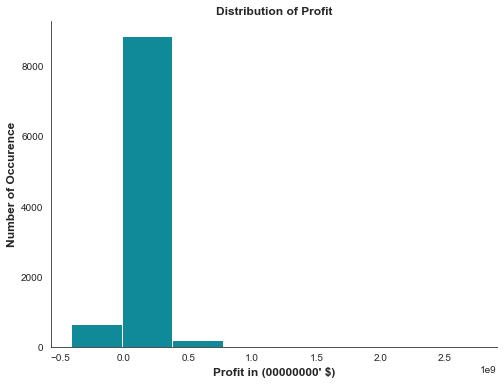

In [48]:
# Visualizing the data distribution for profit 

plt.figure(figsize = (8,6))
sns.set_style('white')
plt.hist(df_movies['profit_adj'], 
        bins = 8,
        color = '#108A99')
plt.xlabel("Profit in (00000000' $)",
            fontsize = 12,
            weight = 'bold')
plt.ylabel("Number of Occurence",
          fontsize = 12,
          weight = 'bold')
plt.title('Distribution of Profit',
         fontsize = 12,
         weight = 'bold')
sns.despine()

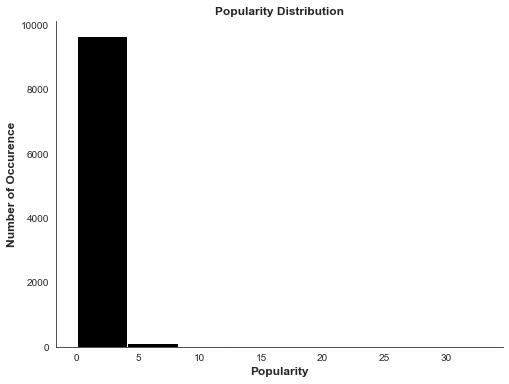

In [49]:
# Visualizing the data distribution for popularity

plt.figure(figsize = (8,6))
sns.set_style('white')
plt.hist(df_movies['popularity'], 
        bins = 8,
        color = 'black')
plt.xlabel("Popularity",
            fontsize = 12,
            weight = 'bold')
plt.ylabel("Number of Occurence",
          fontsize = 12,
          weight = 'bold')
plt.title('Popularity Distribution',
         fontsize = 12,
         weight = 'bold')
sns.despine()

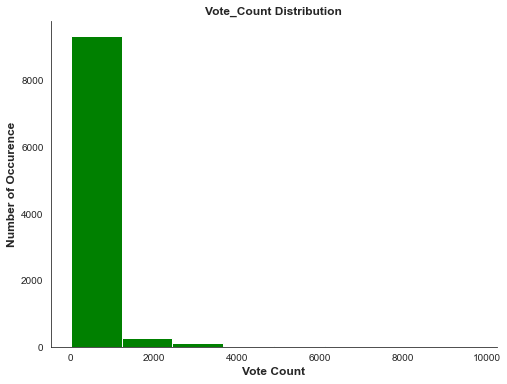

In [50]:
# Visualizing the data distribution for vote_count 

plt.figure(figsize = (8,6))
sns.set_style('white')
plt.hist(df_movies['vote_count'], 
        bins = 8,
        color = 'green')
plt.xlabel("Vote Count",
            fontsize = 12,
            weight = 'bold')
plt.ylabel("Number of Occurence",
          fontsize = 12,
          weight = 'bold')
plt.title('Vote_Count Distribution',
         fontsize = 12,
         weight = 'bold')
sns.despine()

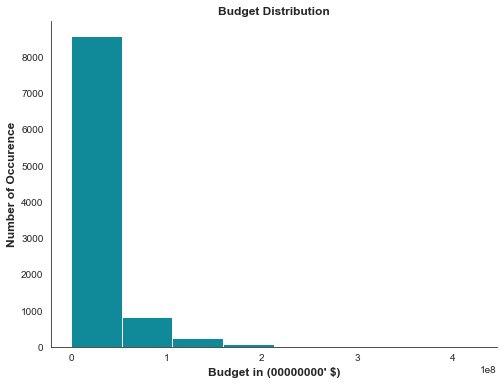

In [51]:
# Visualizing the data distribution for budget_adj 

plt.figure(figsize = (8,6))
sns.set_style('white')
plt.hist(df_movies['budget_adj'], 
        bins = 8,
        color = '#108A99')
plt.xlabel("Budget in (00000000' $)",
            fontsize = 12,
            weight = 'bold')
plt.ylabel("Number of Occurence",
          fontsize = 12,
          weight = 'bold')
plt.title('Budget Distribution',
         fontsize = 12,
         weight = 'bold')
sns.despine()

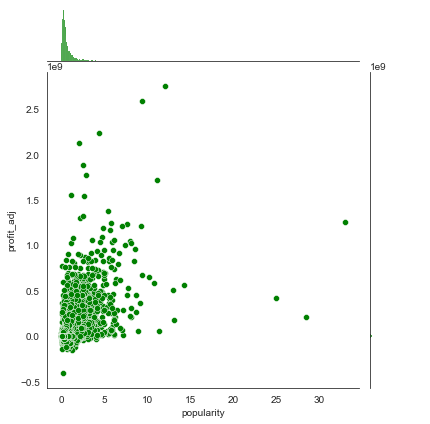

In [52]:
# visualizing the relationship through jointplot
# plot popularity column 
# against profit_adj column 

sns.jointplot(x='popularity',
             y='profit_adj',
             data = df_movies,
             color = 'green');

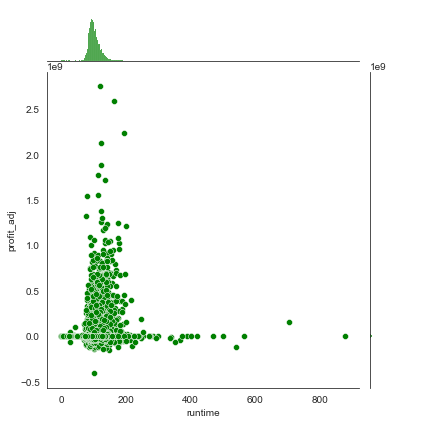

In [53]:
# plot runtime column 
# against profit_adj column 

sns.jointplot(x='runtime',
             y='profit_adj',
             data = df_movies,
             color = 'green');

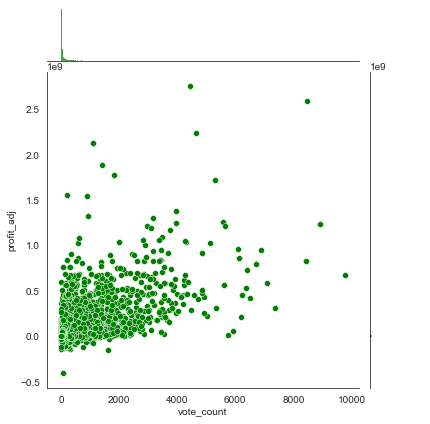

In [54]:
# plot vote_count column 
# against profit_adj column 

sns.jointplot(x='vote_count',
             y='profit_adj',
             data = df_movies,
             color = 'green');

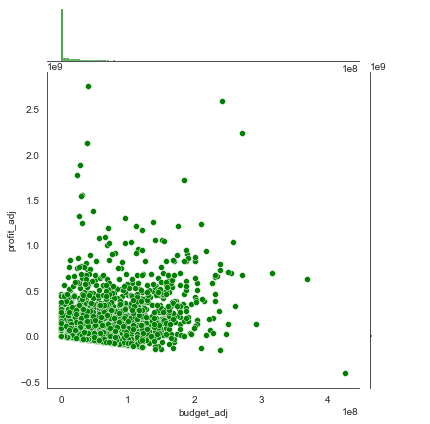

In [55]:
# plot budget_adj column 
# against profit_adj column 

sns.jointplot(x='budget_adj',
             y='profit_adj',
             data = df_movies,
             color = 'green');

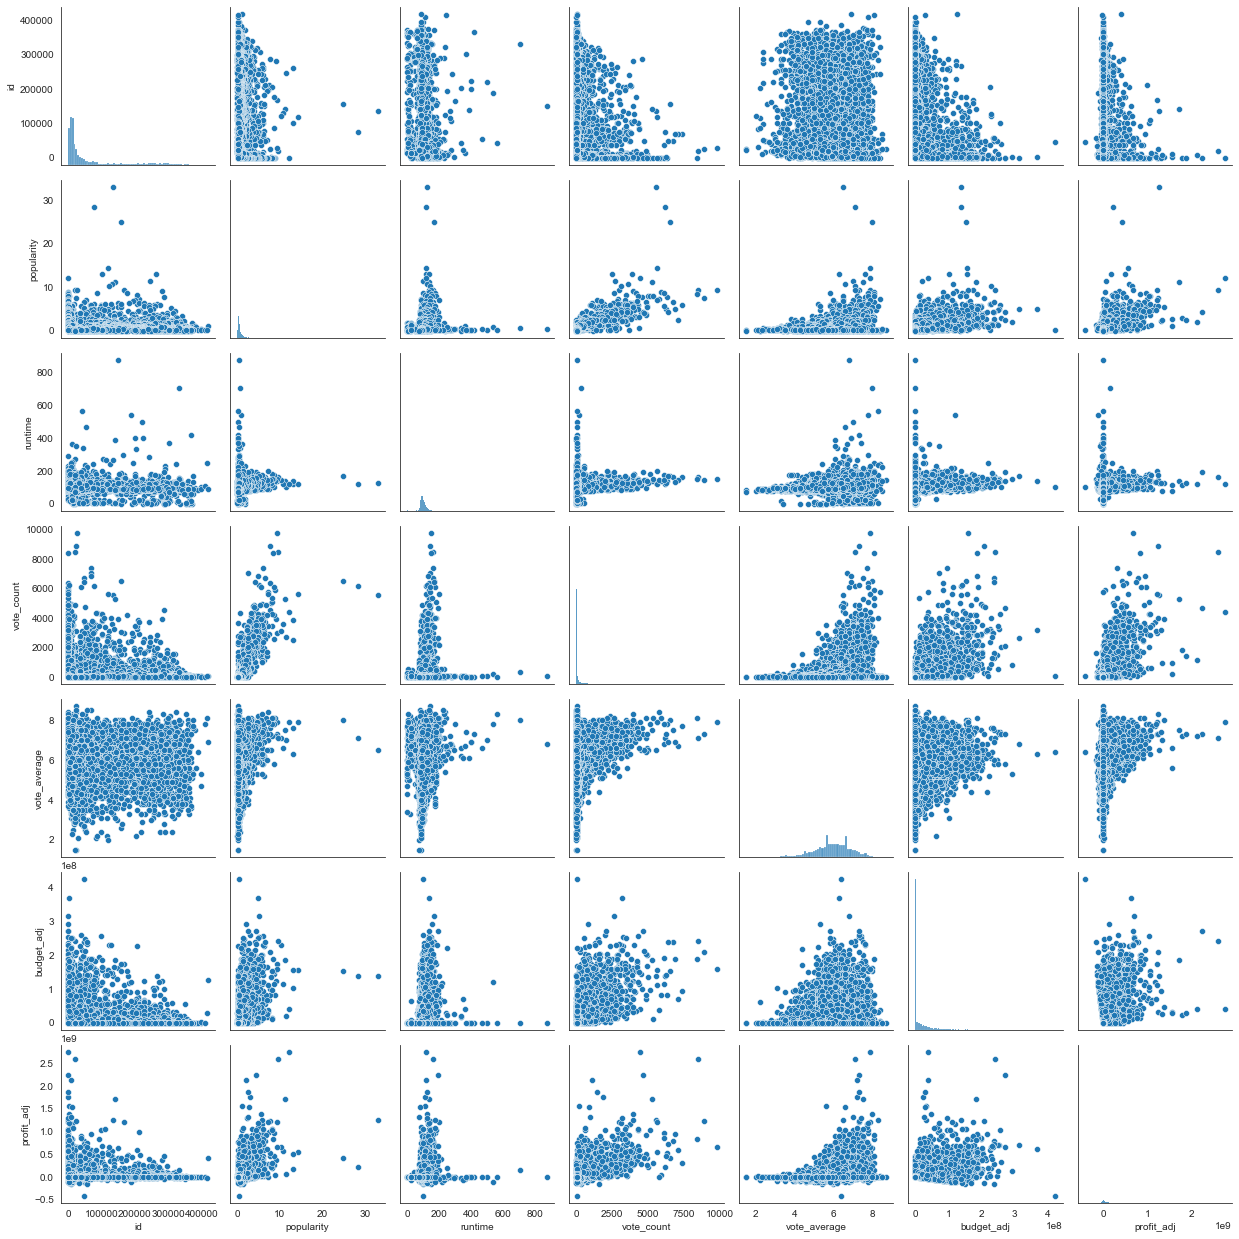

In [56]:
# Visualizing through pairplot for all the numerical variables

sns.pairplot(df_movies)

## Correlation Analysis

### Plotting Correlation Matrix

<AxesSubplot:>

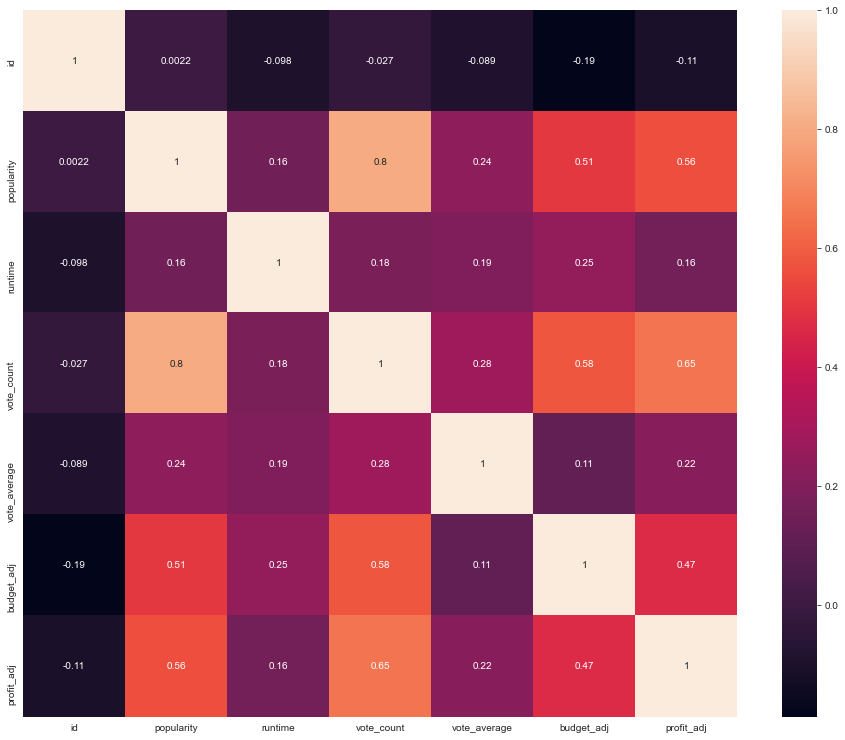

In [57]:
plt.figure(figsize=(16,13)) 
sns.heatmap(df_movies.corr(), annot=True) 

PLOTTING A BAR CHART WITH CORRELATION RESULTS

<AxesSubplot:title={'center':'Correlation with Profit ADJ'}>

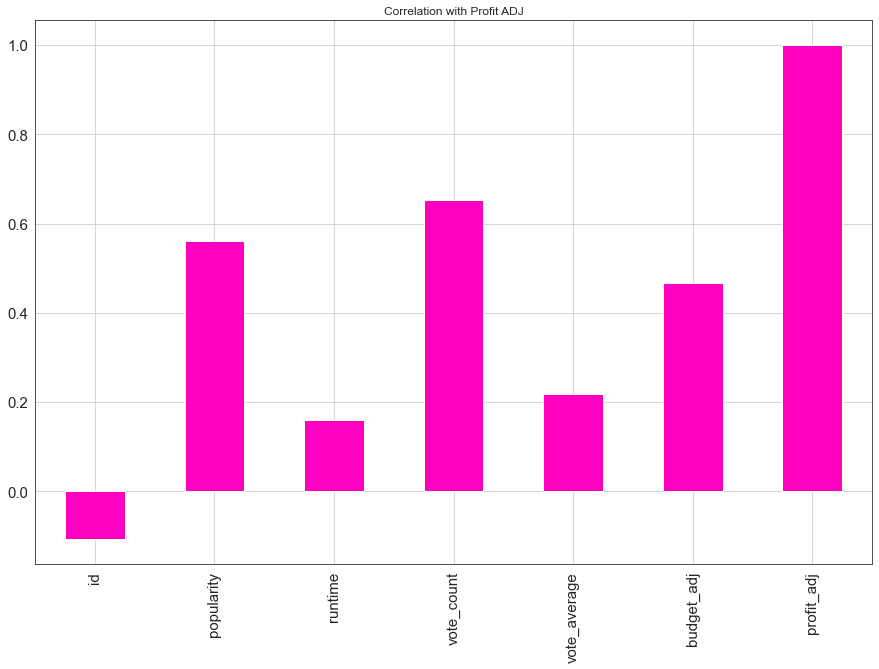

In [58]:
# Putting each correlation figure into bar chart 

df_movies.corrwith(df_movies['profit_adj']).plot.bar(
        figsize = (15, 10), title = "Correlation with Profit ADJ", fontsize = 15,
        rot = 90, grid = True, color = '#ff00c1')

    GOING BY THE ABOVE RESULT, IF WE SET OUT CORRELATION BENCH MARK AT 0.5, ONLY POPULARITY AND VOTE_COUNT FEATURES PASS THE BENCH MARK. 
    
    IN OTHER WORDS, POPULARITY AND VOTE_COUNT FEATURES WILL BE CONSIDERED IF FILM INVESTMENT ARE TO BE RECOMMENDED FOR THE INVESTOR 

We want to know the best selling genres of movie in terms of profit

We would plot genres against the average profit for each genres of movie

# Research 1

## genres vs profit_adj

### Single genre movies vs profit_adj 

In [59]:
## value counts for single genres movies 

df_movies_genres_single.genres.value_counts()

Drama              638
Comedy             615
Horror             231
Documentary        185
Thriller            88
Action              57
Science Fiction     27
Animation           25
Adventure           22
Western             18
Music               16
Family              10
Fantasy              9
War                  5
Romance              5
Mystery              3
Crime                3
TV Movie             1
History              1
Name: genres, dtype: int64

Getting the average profit made from single genres movies to know the categories that are most profitable 

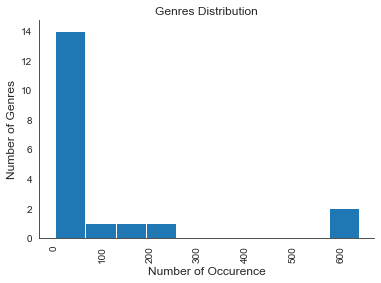

In [60]:
# Visualizing the data distribution for single genres  

df_movies_genres_single.genres.value_counts().plot(kind='hist')
plt.xlabel("Number of Occurence",
            fontsize = 12)
plt.ylabel("Number of Genres",
          fontsize = 12)
plt.title('Genres Distribution',
         fontsize = 12)
plt.xticks(rotation='vertical')
sns.despine();

<Figure size 1440x2880 with 0 Axes>

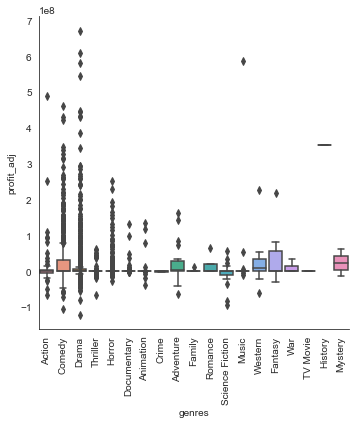

In [61]:
# Visualizing the data distribution between 
# genres and profit_adj
# through box plot

plt.figure(figsize=(20,40))
sns.catplot(x="genres",
            y="profit_adj",
            kind="box", 
            data=df_movies_genres_single)
plt.xticks(rotation='vertical');

In [62]:
## making a dataframe of all the averages per each genres of movies
## here, we are using df_movies_genres_single dataframe 

df_genres_single_avg = df_movies_genres_single.groupby('genres').mean()['profit_adj']
df_genres_single_avg

genres
Action             1.770890e+07
Adventure          1.939190e+07
Animation          1.118414e+07
Comedy             2.795148e+07
Crime             -7.666660e+05
Documentary        2.259565e+06
Drama              2.161629e+07
Family             1.163278e+06
Fantasy            3.653443e+07
History            3.535767e+08
Horror             1.283486e+07
Music              3.945593e+07
Mystery            2.320019e+07
Romance            1.688947e+07
Science Fiction   -6.412705e+06
TV Movie           0.000000e+00
Thriller           2.577488e+06
War                9.747983e+06
Western            2.282316e+07
Name: profit_adj, dtype: float64

Visualizing how each genre fares in BAR CHART 

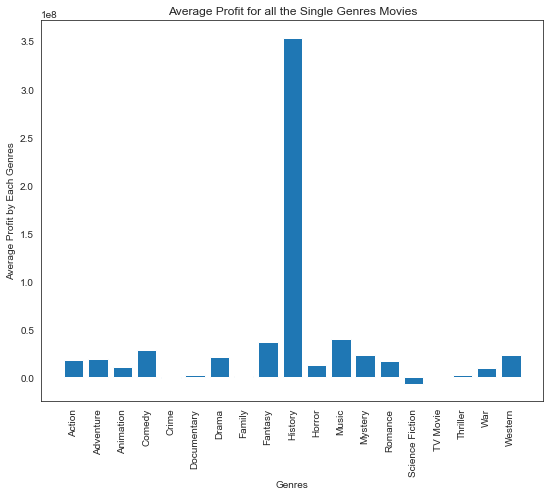

In [63]:
plt.subplots(figsize=(9, 7))
plt.bar(x=df_genres_single_avg.index, 
       height=df_genres_single_avg)
plt.title('Average Profit for all the Single Genres Movies')
plt.xlabel('Genres')
plt.xticks(rotation='vertical')
plt.ylabel('Average Profit by Each Genres');

From the value counts, History genres only had one entry. This does not represent the true picture. So, we would only be focusing on movies with more than 10 entries 

In [64]:
## Getting a series for more than 10 entries single genres

df_movies_genres_single_more_entries = df_movies_genres_single.genres.value_counts()[0:11]
df_movies_genres_single_more_entries

Drama              638
Comedy             615
Horror             231
Documentary        185
Thriller            88
Action              57
Science Fiction     27
Animation           25
Adventure           22
Western             18
Music               16
Name: genres, dtype: int64

In [65]:
# Getting the index for more than 10 entries genres movies 

df_movies_genres_single_more_entries.index

Index(['Drama', 'Comedy', 'Horror', 'Documentary', 'Thriller', 'Action',
       'Science Fiction', 'Animation', 'Adventure', 'Western', 'Music'],
      dtype='object')

In [66]:
## Getting dataframe for genres with more than 10 entries 

df_movies_genres_single_2 = df_movies_genres_single.query('genres in ["Drama", "Comedy", "Horror", "Documentary", "Thriller", "Action","Science Fiction", "Animation", "Adventure", "Western", "Music"]')

df_movies_genres_single_2.head()

,id,popularity,original_title,cast,director,runtime,genres,production_companies,vote_count,vote_average,budget_adj,profit_adj,release_day,release_month
25,177677,4.566713,Mission: Impossible - Rogue Nation,Tom Cruise|Jeremy Renner|Simon Pegg|Rebecca Fe...,Christopher McQuarrie,131,Action,Paramount Pictures|Skydance Productions|China ...,2349,7.1,137999939,489743512,Thursday,July
26,214756,4.564549,Ted 2,Mark Wahlberg|Seth MacFarlane|Amanda Seyfried|...,Seth MacFarlane,115,Comedy,Universal Pictures|Media Rights Capital|Fuzzy ...,1666,6.3,62559972,136034457,Thursday,June
51,257211,2.814802,The Intern,Robert De Niro|Anne Hathaway|Rene Russo|Anders...,Nancy Meyers,121,Comedy,Waverly Films|Warner Bros.,1255,7.1,32199985,146799433,Thursday,September
55,295964,2.584264,Burnt,Bradley Cooper|Sienna Miller|Lily James|Alicia...,John Wells,100,Drama,Double Feature Films|PeaPie Films|3 Arts Enter...,631,6.3,18399991,15278196,Friday,October
58,306819,2.557859,The Danish Girl,Eddie Redmayne|Alicia Vikander|Matthias Schoen...,Tom Hooper,120,Drama,Pretty Pictures|Working Title Films|ArtÃ©mis P...,867,7.3,13799993,45256181,Friday,November


In [67]:
# Getting average profit for genres with more than 10 entries

df_genres_single_avg_2 = df_movies_genres_single_2.groupby('genres').mean()['profit_adj']
df_genres_single_avg_2

genres
Action             1.770890e+07
Adventure          1.939190e+07
Animation          1.118414e+07
Comedy             2.795148e+07
Documentary        2.259565e+06
Drama              2.161629e+07
Horror             1.283486e+07
Music              3.945593e+07
Science Fiction   -6.412705e+06
Thriller           2.577488e+06
Western            2.282316e+07
Name: profit_adj, dtype: float64

    Visualizing the above result 

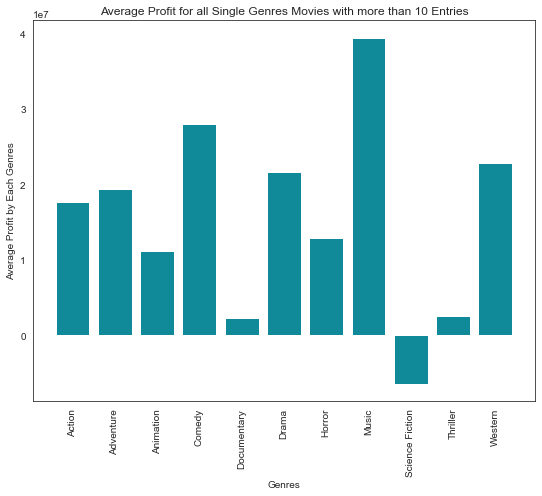

In [68]:
plt.subplots(figsize=(9, 7))
plt.bar(x=df_genres_single_avg_2.index, 
       height=df_genres_single_avg_2,
       color = '#108A99')
plt.title('Average Profit for all Single Genres Movies with more than 10 Entries')
plt.xlabel('Genres')
plt.xticks(rotation='vertical')
plt.ylabel('Average Profit by Each Genres');

Since the genres with highest profit per movie in this category is more than 39M, we want those genres of movies that more than 10M profit per movie in this category

In [69]:
## Get Genres that their average profit per movies is more than 10M
## in this category 

df_genres_single_avg_2_10m = df_genres_single_avg_2 > 10000000
df_genres_single_avg_2_10m

genres
Action              True
Adventure           True
Animation           True
Comedy              True
Documentary        False
Drama               True
Horror              True
Music               True
Science Fiction    False
Thriller           False
Western             True
Name: profit_adj, dtype: bool

We only have:
   - Action
   - Adventure
   - Animation
   - Comedy
   - Drama
   - Horror
   - Music
   - Western

We can still do more by visualizing for genres with more than 100 entries. However, we move forward and analysis the other segment of the dataset 

### Hybrid genre movies vs profit_adj 

#### How do genres that appear as joint genres in movies fare in relation Profit?

In [70]:
## value counts for hybrid genres movies 

df_movies_genres_hybrid_sep.genres.value_counts()

Drama              3726
Comedy             2818
Thriller           2658
Action             2176
Romance            1565
Adventure          1362
Crime              1296
Horror             1295
Science Fiction    1107
Family             1085
Fantasy             830
Mystery             770
Animation           590
Music               323
History             305
War                 253
Western             142
Documentary         132
TV Movie            131
Foreign             120
Name: genres, dtype: int64

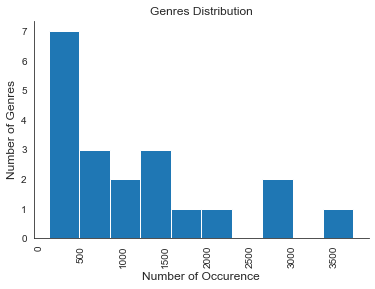

In [71]:
# Visualizing the data distribution for genres with only  

df_movies_genres_hybrid_sep.genres.value_counts().plot(kind='hist')
plt.xlabel("Number of Occurence",
            fontsize = 12)
plt.ylabel("Number of Genres",
          fontsize = 12)
plt.title('Genres Distribution',
         fontsize = 12)
plt.xticks(rotation='vertical')
sns.despine();

In [72]:
## making a dataframe of all the averages per each genres of movies
## here, we are using df_movies_genres_hybrid_sep dataframe 

df_genres_hybrid_avg = df_movies_genres_hybrid_sep.groupby('genres').mean()['profit_adj']
df_genres_hybrid_avg

genres
Action             6.404256e+07
Adventure          1.052345e+08
Animation          7.055454e+07
Comedy             3.695537e+07
Crime              3.674608e+07
Documentary        3.103026e+06
Drama              2.898639e+07
Family             6.897505e+07
Fantasy            8.104141e+07
Foreign           -1.576393e+06
History            2.266100e+07
Horror             1.836614e+07
Music              4.067350e+07
Mystery            3.294445e+07
Romance            3.554839e+07
Science Fiction    6.392447e+07
TV Movie           6.834743e+04
Thriller           3.782611e+07
War                4.397851e+07
Western            2.220996e+07
Name: profit_adj, dtype: float64

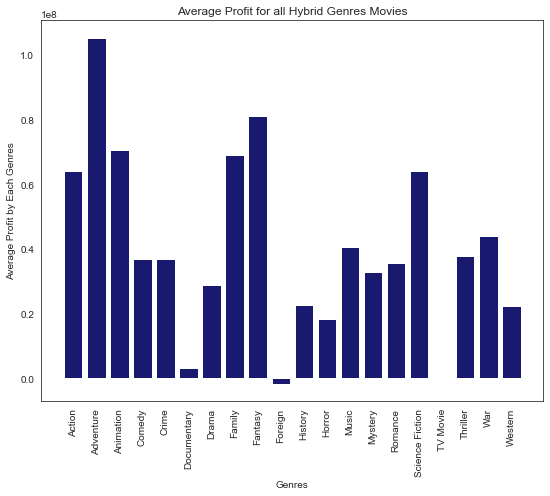

In [73]:
# Visualizing

plt.subplots(figsize=(9, 7))
plt.bar(x=df_genres_hybrid_avg.index, 
       height=df_genres_hybrid_avg,
       color = 'midnightblue')
plt.title('Average Profit for all Hybrid Genres Movies')
plt.xlabel('Genres')
plt.xticks(rotation='vertical')
plt.ylabel('Average Profit by Each Genres');

Since the genres with highest profit per movie is more than 100M, we want those genres of movies that more than 50M profit per movie

In [74]:
## Get Genres that their average profit per movies is more than 50M
## in this category 

df_genres_hybrid_avg_50m = df_genres_hybrid_avg > 50000000
df_genres_hybrid_avg_50m

genres
Action              True
Adventure           True
Animation           True
Comedy             False
Crime              False
Documentary        False
Drama              False
Family              True
Fantasy             True
Foreign            False
History            False
Horror             False
Music              False
Mystery            False
Romance            False
Science Fiction     True
TV Movie           False
Thriller           False
War                False
Western            False
Name: profit_adj, dtype: bool

We only have:
   - Action
   - Adventure
   - Animation
   - Family 
   - Fantasy 
   - Science Fiction

### Combination of both hybrid genre and single genre movies vs profit_adj 


#### Which categories of genres appear to perform better in terms of profit?

In [75]:
## value counts for combination genres movies 

df_movies_genres_comb.genres.value_counts()

Drama              4364
Comedy             3433
Thriller           2746
Action             2233
Romance            1570
Horror             1526
Adventure          1384
Crime              1299
Science Fiction    1134
Family             1095
Fantasy             839
Mystery             773
Animation           615
Music               339
Documentary         317
History             306
War                 258
Western             160
TV Movie            132
Foreign             120
Name: genres, dtype: int64

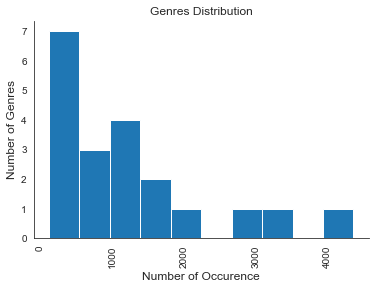

In [76]:
# Visualizing the data distribution for genres with the whole combination

df_movies_genres_comb.genres.value_counts().plot(kind='hist')
plt.xlabel("Number of Occurence",
            fontsize = 12)
plt.ylabel("Number of Genres",
          fontsize = 12)
plt.title('Genres Distribution',
         fontsize = 12)
plt.xticks(rotation='vertical')
sns.despine();

In [77]:
## making a dataframe of all the averages per each genres of movies
## here, we are using df_movies_genres_hybrid_sep dataframe 

df_genres_comb_avg = df_movies_genres_comb.groupby('genres').mean()['profit_adj']
df_genres_comb_avg

genres
Action             6.285984e+07
Adventure          1.038700e+08
Animation          6.814111e+07
Comedy             3.534238e+07
Crime              3.665945e+07
Documentary        2.610785e+06
Drama              2.790891e+07
Family             6.835576e+07
Fantasy            8.056398e+07
Foreign           -1.576393e+06
History            2.374243e+07
Horror             1.752884e+07
Music              4.061603e+07
Mystery            3.290663e+07
Romance            3.548896e+07
Science Fiction    6.224977e+07
TV Movie           6.782964e+04
Thriller           3.669652e+07
War                4.331513e+07
Western            2.227894e+07
Name: profit_adj, dtype: float64

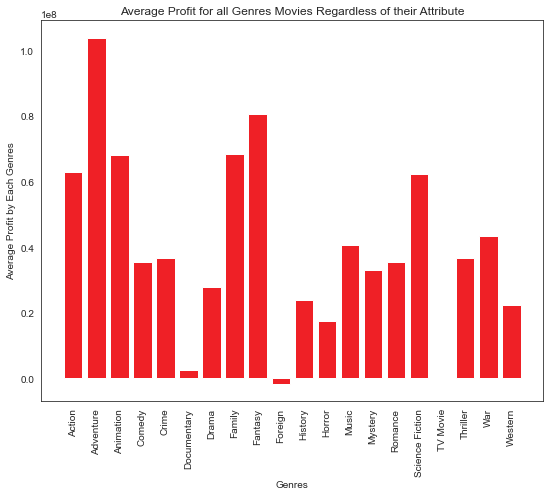

In [78]:
# Visualizing

plt.subplots(figsize=(9, 7))
plt.bar(x=df_genres_comb_avg.index, 
       height=df_genres_comb_avg,
       color = '#ef2026')
plt.title('Average Profit for all Genres Movies Regardless of their Attribute')
plt.xlabel('Genres')
plt.xticks(rotation='vertical')
plt.ylabel('Average Profit by Each Genres');

Since the genres with highest profit per movie is more than 100M, we want those genres of movies that more than 50M profit per movie

In [79]:
## Get Genres that their average profit per movies is more than 50M
## in this category 

df_genres_comb_avg_50m = df_genres_comb_avg > 50000000
df_genres_comb_avg_50m

genres
Action              True
Adventure           True
Animation           True
Comedy             False
Crime              False
Documentary        False
Drama              False
Family              True
Fantasy             True
Foreign            False
History            False
Horror             False
Music              False
Mystery            False
Romance            False
Science Fiction     True
TV Movie           False
Thriller           False
War                False
Western            False
Name: profit_adj, dtype: bool

We only have:
   - Action
   - Adventure
   - Animation
   - Family 
   - Fantasy 
   - Science Fiction

    THREE CRUCIAL GENRES THAT ARE COMMON TO THE CATEROGIES ARE;
    
    - ACTION
    - ADVENTURE
    - ANIMATION 
    
    SO, RECOMMENDING MOVIE GENRES WOULD BE ANY OF THOSE THREE. 

# Research 2


## Release Month & Release Day VS Profit 

### What are the months that perform better in terms of Profit?

In [80]:
# Value counts for each month
# We would be using df_movies dataframe

df_movies.release_month.value_counts()

September    1203
October      1036
December      896
August        842
June          766
January       745
May           741
March         739
November      736
April         724
July          714
February      628
Name: release_month, dtype: int64

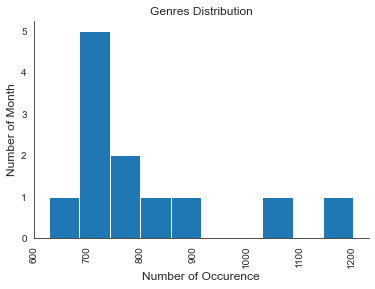

In [81]:
# Visualizing the data distribution for each release month

df_movies.release_month.value_counts().plot(kind='hist')
plt.xlabel("Number of Occurence",
            fontsize = 12)
plt.ylabel("Number of Month",
          fontsize = 12)
plt.title('Month Distribution',
         fontsize = 12)
plt.xticks(rotation='vertical')
sns.despine();

    September and October have the highest movie entries. While July and February have the lowest entries. 

    We would be grouping each by month for movie entry and find there average profits 

In [82]:
## making a dataframe of all the averages per each genres of movies
## here, we are using df_movies_genres_hybrid_sep dataframe 

df_month_avg = df_movies.groupby('release_month').mean()['profit_adj']
df_month_avg

release_month
April        2.695948e+07
August       2.303456e+07
December     6.526750e+07
February     2.028407e+07
January      1.380942e+07
July         5.635076e+07
June         7.592793e+07
March        3.628306e+07
May          5.811682e+07
November     5.443510e+07
October      2.186612e+07
September    1.361546e+07
Name: profit_adj, dtype: float64

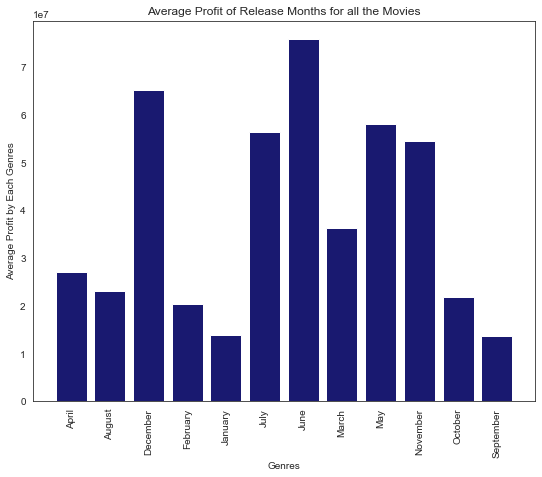

In [83]:
# Visualizing
sns.set_style('white')
plt.subplots(figsize=(9, 7))
plt.bar(x=df_month_avg.index, 
       height=df_month_avg,
       color = 'midnightblue')
plt.title('Average Profit of Release Months for all the Movies')
plt.xlabel('Genres')
plt.xticks(rotation='vertical')
plt.ylabel('Average Profit by Each Genres');

Since the month with highest profit per movie is more than 75M, we want know those months that are associated with more than 50M profit per movie

In [84]:
## Get months that their average profit per movies is more than 50M 

df_month_avg_50m = df_month_avg > 50000000
df_month_avg_50m

release_month
April        False
August       False
December      True
February     False
January      False
July          True
June          True
March        False
May           True
November      True
October      False
September    False
Name: profit_adj, dtype: bool

We only have:
   - June
   - July 
   - May
   - November
   - December 

#### What are the release_days that perform better in terms of Profit?

In [85]:
# Value counts for each month
# We would be using df_movies dataframe

df_movies.release_day.value_counts()

Friday       3905
Thursday     1560
Wednesday    1406
Tuesday      1052
Saturday      683
Sunday        597
Monday        567
Name: release_day, dtype: int64

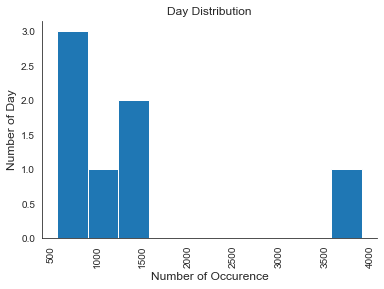

In [86]:
# Visualizing the data distribution for each release day

df_movies.release_day.value_counts().plot(kind='hist')
plt.xlabel("Number of Occurence",
            fontsize = 12)
plt.ylabel("Number of Day",
          fontsize = 12)
plt.title('Day Distribution',
         fontsize = 12)
plt.xticks(rotation='vertical')
sns.despine();

In [87]:
## making a dataframe for all the averages per each release day of movies
## here, we are using df_movies dataframe 

df_day_avg = df_movies.groupby('release_day').mean()['profit_adj']
df_day_avg

release_day
Friday       2.668770e+07
Monday       4.073020e+07
Saturday     1.485614e+07
Sunday       2.579939e+07
Thursday     4.860469e+07
Tuesday      4.382600e+07
Wednesday    6.614726e+07
Name: profit_adj, dtype: float64

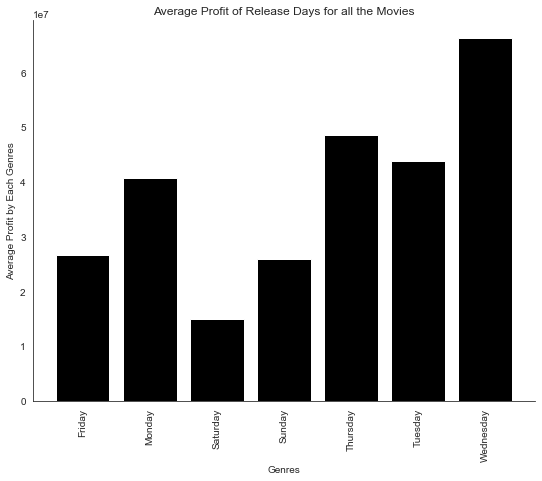

In [88]:
# Visualizing
sns.set_style('white')
plt.subplots(figsize=(9, 7))
plt.bar(x=df_day_avg.index, 
       height=df_day_avg,
       color = 'k')
plt.title('Average Profit of Release Days for all the Movies')
plt.xlabel('Genres')
plt.xticks(rotation='vertical')
plt.ylabel('Average Profit by Each Genres')
sns.despine();

Since the day with highest profit per movie is more than 65M, we want know those days that are associated with more than 40M profit per movie

In [89]:
## Get days that their average profit per movies is more than 40M

df_day_avg_40m = df_day_avg > 40000000
df_day_avg_40m

release_day
Friday       False
Monday        True
Saturday     False
Sunday       False
Thursday      True
Tuesday       True
Wednesday     True
Name: profit_adj, dtype: bool

We only have:
- Monday
- Thursday
- Tuesday
- Wednesday 

## Conclusions

#### Results Overview:
WE ANALYSED THIS DATASET IN TWO SEGMENTS;
- NUMERICAL 
- CATEGORICAL

IN TERMS NUMERICAL ANALYSIS, WE SAW THAT ONLY POPULARITY AND VOTE_COUNT ARE TO BE CONSIDERED WHEN MAKING FILM RECOMMENDATION TO INVESTOR. THEY PERFORMED BETTER IN TERMS OF CORRELATION TO PROFIT 

IN TERMS OF CATEGORICAL ANALYSIS, WE FOCUSED ON ONLY THREE FEATURES
- THEY ARE:
    - GENRES 
    - MONTH 
    - DAY 

GENRES FEATURE
- THE FOLLOWING ARE TO BE RECOMMENDED:
    - ACTION
    - ADVENTURE
    - ANIMATION 

MONTH FEATURE
- THE FOLLOWING ARE TO BE RECOMMENDED:
   - June
   - July 
   - May
   - November
   - December 
   
DAY FEATURE 
- THE FOLLOWING ARE TO BE RECOMMEDED:
    - Monday
    - Thursday
    - Tuesday
    - Wednesday

#### Limitations:
THERE ARE COUPLE OF LIMITATIONS IN THE DATA:
- SOME INDEPENDENT VARIABLES (CATEGORICAL) THAT COULD HAVE PROVIDED MUCH INSIGHT IN RELATION OF THEIR CORRELATION TO PROFIT COULD NOT BE DETERMINED AS ENGINEERING THEM TO NUMERICAL VARIABLE IS OUTSIDE THE SCOPE OF THIS PROJECT. 
- WE DO NOT HAVE A LOT OF DETAIL TO DRAW CONCLUSION ABOUT ENGINEERED FEATURES (RELEASE DAYS AND MONTHS) ON HOW EFFECTIVE THEY WOULD BE WHEN CONSIDERED.
- THE CATEGORICAL VARIABLE ARE NOT EVENLY DISTRIBUTED. WHICH SAYS THAT, THERE ARE SOME CATOGORIES IN DATA THAT ARE MORE REPRESENTED THAN THE OTHER. 
- ALSO, THE NUMERICAL FEATURES DO NOT HAVE STRONG CORRELATION TO THE TARGET VARIABLE. 